In [1]:
from statistics import mean
import quandl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math
style.use('fivethirtyeight')

In [2]:
df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. Close']]
df.dropna(inplace=True)
forcast_col = 'Adj. Close'
forcast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forcast_col].shift(-forcast_out)
df

,Adj. Open,Adj. Close,label
Date,,,
2004-08-19,50.159839,50.322842,69.078238
2004-08-20,50.661387,54.322689,67.839414
2004-08-23,55.551482,54.869377,68.912727
2004-08-24,55.792225,52.597363,70.668146
2004-08-25,52.542193,53.164113,71.219849
2004-08-26,52.637487,54.122070,72.278116
2004-08-27,54.217364,53.239345,74.810934
2004-08-30,52.802998,51.162935,74.199045
2004-08-31,51.318415,51.343492,70.462511


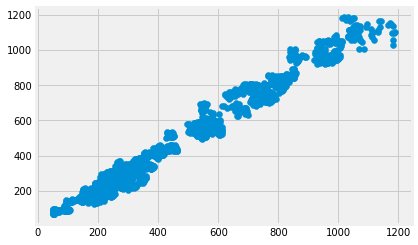

In [5]:
my_x = np.array(df[forcast_col])[-forcast_out:]
df.dropna(inplace=True)
xs = np.array(df[forcast_col])
ys = np.array(df['label'])
plt.scatter(xs,ys)
plt.show()

In [6]:
from statistics import mean
m = ((mean(xs)*mean(ys)) - mean(xs*ys)) / ((mean(xs)**2) - mean(xs**2))
b = mean(ys) - (m*mean(xs))
print(m, b)

1.0172830132960318 3.762132085707549


In [12]:
best_fit_line = [(m*x) + b for x in xs]
squared_error_best_reg = sum((best_fit_line-ys)**2)
mean_line = [mean(ys) for y in ys]
square_error_mean = sum((mean_line-ys)**2)
print(square_error_mean, squared_error_best_reg)

223074965.23972607 4945056.334364478


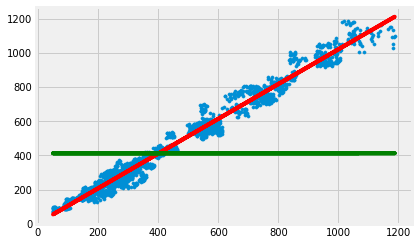

In [14]:
plt.scatter(xs,ys,s=10)
plt.plot(xs,best_fit_line, color='r')
plt.plot(xs,mean_line, color='g')
plt.show()

In [8]:
R_square = 1 - (squared_error_best_reg / square_error_mean)
print(R_square)

0.9778323115323573
